In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split

# Import Numpy
import numpy as np
# For timer
import time
# Import OS
import os

# ==== LOCAL LIBS ====
import ecg_tools_lite as et
import evaluator as eva
import trainer as tr
import models as mod

# Summary-like from Tensorflow
from torchsummary import summary

# wfdb
import wfdb
from wfdb import processing

In [6]:
dae_res = np.load('res_pt_full_DAE_em_e00.npy')
cnn_res = np.load('res_pt_full_CNN_em_e00.npy')
ecg_clean = np.load('all_none_fs1024_e24.npy')
ecg_noisy = np.load('all_none_fs1024_e00.npy')

ecg_noisy = et.norm_sig( ecg_noisy )
ecg_clean = et.norm_sig( ecg_clean )

# dae_res = et.realign_starting(dae_res, ecg_clean.flatten())
# cnn_res = et.realign_starting(cnn_res, ecg_clean.flatten())

<Figure size 1440x576 with 0 Axes>

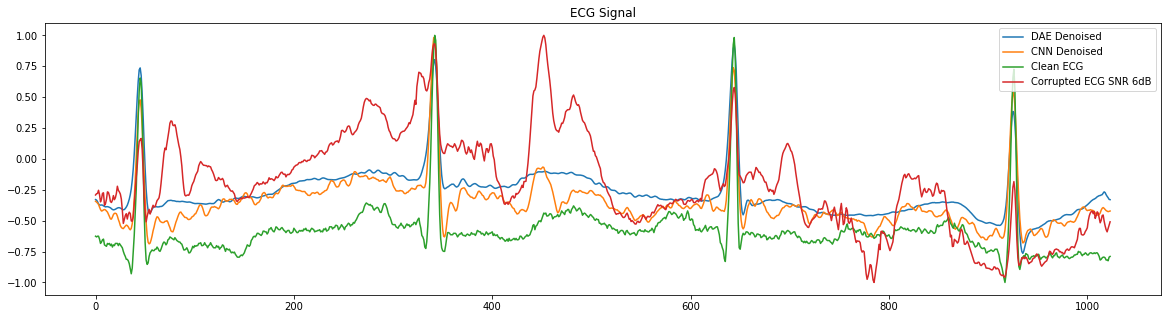

In [8]:
et.ecg_plot([dae_res.flatten(), cnn_res.flatten(), ecg_clean.flatten(), ecg_noisy.flatten()], ['DAE Denoised', 'CNN Denoised', 'Clean ECG', 'Corrupted ECG SNR 6dB'])

In [9]:
dae_res = et.realign_starting(dae_res.flatten(), ecg_clean.flatten())
cnn_res = et.realign_starting(cnn_res.flatten(), ecg_clean.flatten())

Diff: -0.2963363763363248
-0.6257309941520464 - -0.6257309941520464
-0.6257309941520464 - -0.6257309941520464
Diff: -0.2829708888578575
-0.6257309941520464 - -0.6257309941520464
-0.6257309941520464 - -0.6257309941520464


<Figure size 1440x576 with 0 Axes>

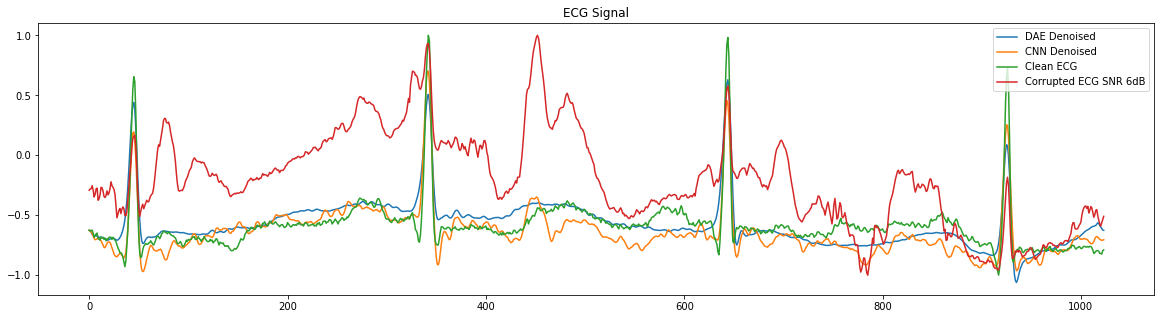

In [10]:
et.ecg_plot([dae_res, cnn_res, ecg_clean.flatten(), ecg_noisy.flatten()], ['DAE Denoised', 'CNN Denoised', 'Clean ECG', 'Corrupted ECG SNR 6dB'])